In [1]:
# Google
from google.cloud import bigquery
import google.auth

import warnings
warnings.filterwarnings("ignore")

import sys


# General
import pandas as pd 
import numpy as np
import datetime
import itertools as it
import re
from datetime import datetime
from dateutil.relativedelta import relativedelta

from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.feature_selection import SelectKBest, SelectFromModel
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.metrics import mean_squared_error
from sklearn.utils.validation import check_is_fitted

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

import matplotlib.pyplot as plt

# test avec les données data
data = pd.DataFrame([[10, 11, 12, 13, 100, 2000, 0], 
                     [21, 22, 23, 24, 101, 2001, 1],
                     [31, 32, 33, 34, 102, 2002, 2],
                     [41, 42, 43, 44, 103, 2003, 3],
                     [51, 52, 53, 54, 104, 2004, 4],
                     [61, 62, 63, 64, 105, 2005, 5],
                     [71, 72, 73, 74, 106, 2006, 6],
                     [81, 82, 83, 84, 107, 2007, 7],
                     [91, 92, 93, 94, 108, 2008, 8],
                     [101, 102, 103, 104, 109, 2009, 9],
                     [10, 11, 12, 13, 100, 2010, 1000], 
                     [21, 22, 23, 24, 101, 2011, 1001],
                     [31, 32, 33, 34, 102, 2012, 1002],
                     [41, 42, 43, 44, 103, 2013, 1003],
                     [51, 52, 53, 54, 104, 2014, 1004]], columns=['data1', 'data2', 'data3', 'data4', 'known', 'annee', 'label'])

In [2]:
from conso_pilref_consods.predict.preprocessing import WindowGenerator
from conso_pilref_consods.predict.keras import CoreModel, OneShot, AutoRegressive
import tensorflow as tf

In [3]:
data

,data1,data2,data3,data4,known,annee,label
0,10,11,12,13,100,2000,0
1,21,22,23,24,101,2001,1
2,31,32,33,34,102,2002,2
3,41,42,43,44,103,2003,3
4,51,52,53,54,104,2004,4
5,61,62,63,64,105,2005,5
6,71,72,73,74,106,2006,6
7,81,82,83,84,107,2007,7
8,91,92,93,94,108,2008,8
9,101,102,103,104,109,2009,9


In [4]:
model = RandomForestRegressor() # Création du modèle
forecast = 3 # nb de steps prédits
test_size = 2 # nombre d'exemples de test
valid_size = 2 # nombre d'exemples de validation

df = data.dropna(axis=1, how='all').dropna()

input_columns = ['data1', 'data2', 'data3', 'data4', 'known', 'annee', 'label'] # Colonnes historiques connues

window = 1

known_columns = ['annee','known'] # Colonnes futurs connues comme la temporalité
label_columns = ['label'] # Colonne à prédire
date_columns = ['annee'] # Date 
                        
w = WindowGenerator(data=df, input_width=window, label_width=forecast, 
                shift=forecast, test_size=test_size, 
                valid_size=valid_size, batch_size=None,
                input_columns=input_columns,
                known_columns=known_columns, 
                label_columns=label_columns,
                date_columns=date_columns)


m = OneShot(model, n_steps=forecast)  # Création du modèle keras
m.compile()
m.fit(w.train)

1/1 [==============================] - 0s 5ms/step


In [5]:
w # On peut afficher les informations du génératuer de fenêtres

Début du générateur de fenêtre 


            Les colonnes d'entrées sont : ['data1', 'data2', 'data3', 'data4', 'known', 'annee', 'label']
            Les colonnes connues sont : ['annee', 'known']
            Les colonnes sorties sont : ['label']
            Les colonnes dates sont : ['annee'] 


            Les indices associés à chaque colonne sont: {'data1': 0, 'data2': 1, 'data3': 2, 'data4': 3, 'known': 4, 'annee': 5, 'label': 6} 


            Rappel des paramètres:

            - input_width : 1
            - label_width : 3 
            - shift : 3
            - test_size : 2 
            - valid_size : 2
            - batch_size : 9 


            Le set d'entrainement devient : 
    data1  data2  data3  data4  known  annee  label
0     10     11     12     13    100   2000      0
1     21     22     23     24    101   2001      1
2     31     32     33     34    102   2002      2
3     41     42     43     44    103   2003      3
4     51     52     53     54    104   2004 

In [6]:
m.predict(w.test).shape

(2, 3, 1)

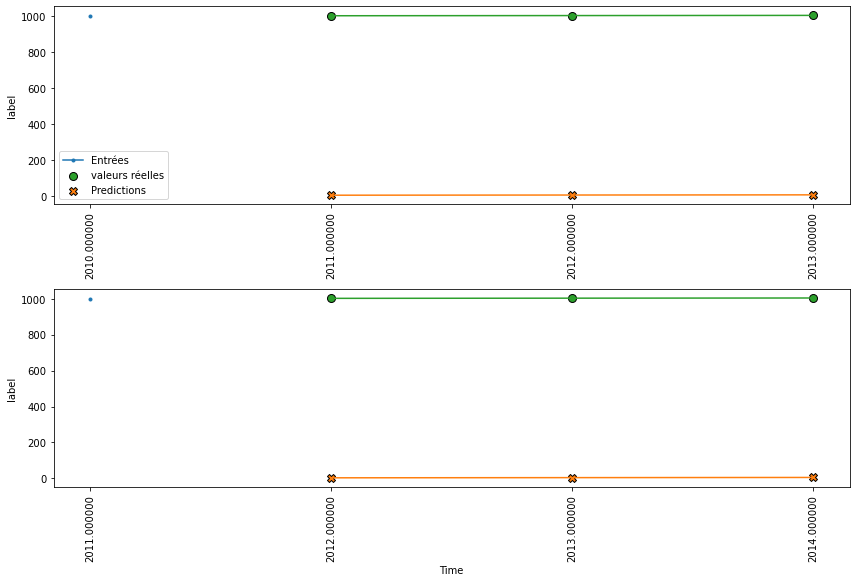

In [7]:
w.plot(w.test,
       'label',
      model=m)

In [8]:
forecast = 1 # autoregressive donc 1 seule step
test_size = 4
valid_size = 4

df = data.dropna(axis=1, how='all').dropna()

input_columns = ['data1', 'data2', 'data3', 'data4', 'known', 'annee', 'label']

window = 1

known_columns = ['annee','known']
label_columns = ['label']
date_columns = ['annee']
                        
w = WindowGenerator(data=df, input_width=window, label_width=forecast, 
                shift=forecast, test_size=test_size, 
                valid_size=valid_size, batch_size=None,
                input_columns=input_columns,
                known_columns=known_columns, 
                label_columns=label_columns,
                date_columns=date_columns)

# Utilisaton de la stratégie autoregressive avec n_steps qui défini le nb de steps à prédire. Le nombre total de steps prédits = n_steps * forecast
m = AutoRegressive(model=RandomForestRegressor(), n_steps=3, labels_in_inputs_indices=w.labels_in_inputs_indices) # autoregressive
m.compile()
m.fit(w.train)

1/1 [==============================] - 0s 4ms/step


In [9]:
w

Début du générateur de fenêtre 


            Les colonnes d'entrées sont : ['data1', 'data2', 'data3', 'data4', 'known', 'annee', 'label']
            Les colonnes connues sont : ['annee', 'known']
            Les colonnes sorties sont : ['label']
            Les colonnes dates sont : ['annee'] 


            Les indices associés à chaque colonne sont: {'data1': 0, 'data2': 1, 'data3': 2, 'data4': 3, 'known': 4, 'annee': 5, 'label': 6} 


            Rappel des paramètres:

            - input_width : 1
            - label_width : 1 
            - shift : 1
            - test_size : 4 
            - valid_size : 4
            - batch_size : 7 


            Le set d'entrainement devient : 
    data1  data2  data3  data4  known  annee  label
0     10     11     12     13    100   2000      0
1     21     22     23     24    101   2001      1
2     31     32     33     34    102   2002      2
3     41     42     43     44    103   2003      3
4     51     52     53     54    104   2004 

In [10]:
m.predict(w.test)

array([[[2.78],
        [3.06],
        [3.52]],

       [[3.14],
        [3.52],
        [4.28]]])

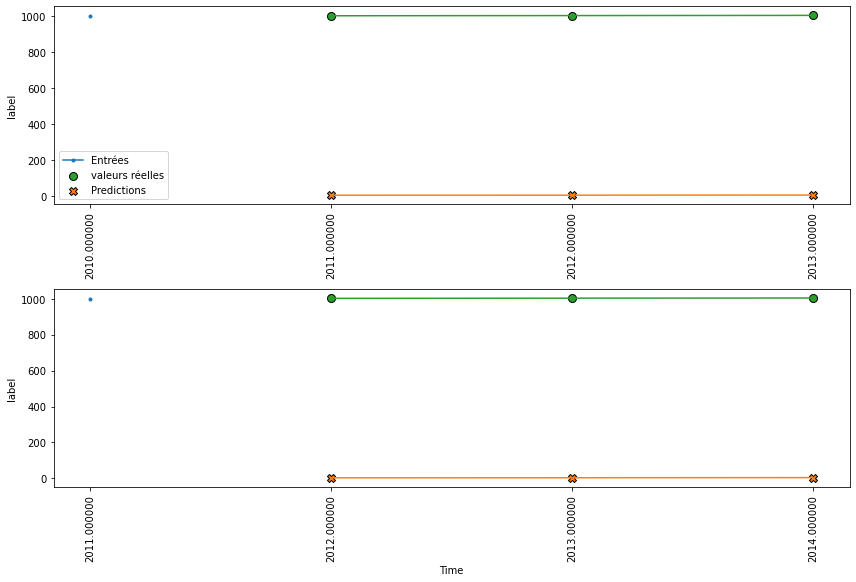

In [11]:
w.plot(w.test,
       'label',
       model=m)